In [52]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
from sklearn.datasets import make_moons

n_samples = 1000

#make_moons()會對x自動生成二維的資料集，y則是一維
x , y = make_moons(n_samples = n_samples ,random_state = 1234)

print(x.shape , y.shape)

(1000, 2) (1000,)


In [54]:
make_moons_df = pd.DataFrame({'col_1': x[: , 0] , 'col_2': x[: , 1], 'label': y})
make_moons_df.head()

,col_1,col_2,label
0,0.581984,-0.408439,1
1,1.998395,0.443368,1
2,0.560468,0.828176,0
3,1.116209,-0.493225,1
4,-0.927158,0.374671,0


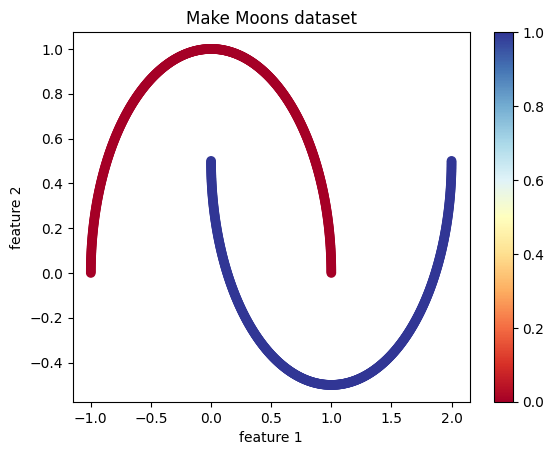

In [72]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu); #c=y表示，依y的資料點做顏色分類
plt.xlabel('feature 1')
plt.ylabel("feature 2")
plt.title("Make Moons dataset")
plt.colorbar()
plt.show()
#呈現原始資料集中的兩個自變項（ｘ、ｙ軸）預測依變項結果（０、１用顏色表示）

In [56]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 1234)

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [57]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(32 , activation= 'relu'), #ReLU（Rectified Linear Unit）將負值設為 0，正值保持不變
    layers.Dense(10 , activation= 'relu'),
    #layers.Flatten(),
    layers.Dense(1 , activation= 'sigmoid') #Sigmoid函數的輸出範圍是0到1之間
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(), #二元交叉熵作為損失函數，適用於二分類問題
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.fit(x_train , y_train, epochs = 15)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7140 - loss: 0.6628
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7300 - loss: 0.6285 
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.5831 
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8191 - loss: 0.5401
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.5135
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7998 - loss: 0.4591
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8214 - loss: 0.4004
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8362 - loss: 0.3668
Epoch 9/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8478 - loss: 0.3207
Epoch 10/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8740 - loss: 0.2986
Epoch 11/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8638 - loss: 0.2927
Epoch 12/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8912 - 

In [58]:
def plot_decision_boundary(model, x, y):

  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1 #增加緩衝區，圖形的邊界就不會在資料點的邊緣
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), #表示生成從x_min到x_max之間的1000個等間距的資料點
              np.linspace(y_min, y_max, 1000))

  x_in = np.c_[xx.ravel(), yy.ravel()] #變成二維的資料集

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) #選擇每個網格點之最大機率的類別
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7) #alpha表示透明度
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu) #s表示每個點的大小
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  plt.title('Decision Boundary and Data Points')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.colorbar()
  plt.show()

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step
doing binary classifcation...


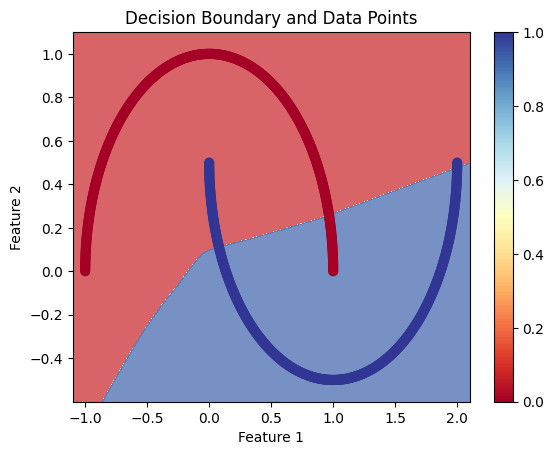

In [51]:
plot_decision_boundary(model , x , y)

In [59]:
#使用Fashion MNIST資料集
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

train_images.shape , train_labels.shape , test_images.shape , test_labels.shape
#每個圖的大小是28x28像素

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [60]:
def softmax(x):

  x = tf.cast(x , dtype = tf.float32) #將x轉換為float32型態

  e_x = tf.math.exp(x - tf.math.reduce_max(x)) #減去最大值，避免溢位
  return e_x / tf.math.reduce_sum(e_x , axis = 0) #進行標準化，將每個指數值除以總和，將其轉換為機率，這樣每個元素的值都在0和1之間，並且所有元素的總和為1

In [61]:
#進行測試
tensor = tf.constant([[1, 2, 3, 6],
            [2, 4, 5, 6],
            [3, 8, 7, 6]] )
tensor

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 6],
       [2, 4, 5, 6],
       [3, 8, 7, 6]], dtype=int32)>

In [62]:
softmax(tensor)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.3333333 ],
       [0.24472849, 0.01794253, 0.11731043, 0.3333333 ],
       [0.66524094, 0.9796292 , 0.8668133 , 0.3333333 ]], dtype=float32)>

In [63]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

num_classes = 10

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [64]:
simple_model = tf.keras.Sequential([
  layers.Flatten(input_shape = (28 , 28)),
  layers.Dense(64 , activation= 'relu'),
  layers.Dense(32 , activation = 'relu'),
  layers.Dense(10 , activation='softmax') #有10個類別
])

simple_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ['accuracy'])


history = simple_model.fit(train_images , train_labels , epochs = 20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5001 - loss: 4.7292
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6501 - loss: 0.9321
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6967 - loss: 0.8053
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7480 - loss: 0.6669
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8036 - loss: 0.5660
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8247 - loss: 0.5120
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8345 - loss: 0.4825
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8417 - loss: 0.4585
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8507 - loss: 0.4413
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8520 - loss: 0.4366
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8534 - loss: 0.4241
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━

In [65]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  #標準化混淆矩陣，將每個元素除以其所在row的總和，得到每個元素在其所在row的比例。
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #增加一個維度，將row總和轉換為一個column向量
  n_classes = cm.shape[0] #表示混淆矩陣的row數，等於類別數。

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2. #計算閾值

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [66]:
pred_probs = simple_model.predict(test_images)

preds = pred_probs.argmax(axis = 1) #返回的是pred_probs中每一row中最大值的索引，即每個樣本之預測機率最大的類別索引。

preds[:10] #顯示前10個資料點是甚麼類別

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])

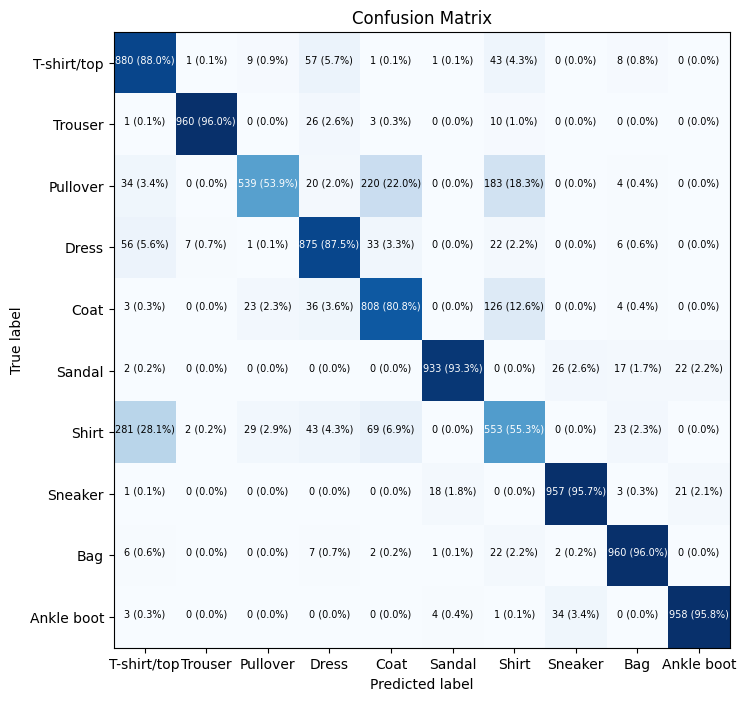

In [67]:
make_confusion_matrix(y_true = test_labels,
           y_pred = preds,
           classes = class_names,
           figsize = (8 , 8),
           text_size = 7)

In [68]:
preds = simple_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [69]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i] #i表示圖片的索引
  plt.grid(False) #不顯示圖片的網格線
  plt.xticks([]) #隱藏x軸和y軸的刻度
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary) #圖片以灰度（binary）方式顯示

  predicted_label = np.argmax(predictions_array) #取得預測結果中機率最高的類別
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                      100*np.max(predictions_array), #將預測的機率轉為百分比
                      class_names[true_label]),
                      color=color)
  #預測類別名稱 預測百分比% (真實類別名稱)，舉例Bag 91% (Sneaker)，表示預測圖片為Bag機率為91%

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10)) #設置x軸刻度為0到9（依照類別設置）
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red') #將預測標籤的長條圖顯示為紅色，表示模型的預測
  thisplot[true_label].set_color('blue') #將真實標籤的長條圖顯示為藍色，表示正確的值
  #灰色：表示其他類別的預測機率，這些類別既不是模型的最終預測，也不是實際的類別



def plot_prediction_images():
  #表示5x3個圖片
  num_rows = 5
  num_cols = 3
  num_images = num_rows * num_cols
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , preds[i], test_labels , test_images)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i , preds[i] ,  test_labels)
  plt.tight_layout() #自動調整子圖的佈局，避免重疊、擁擠
  plt.show()

In [70]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

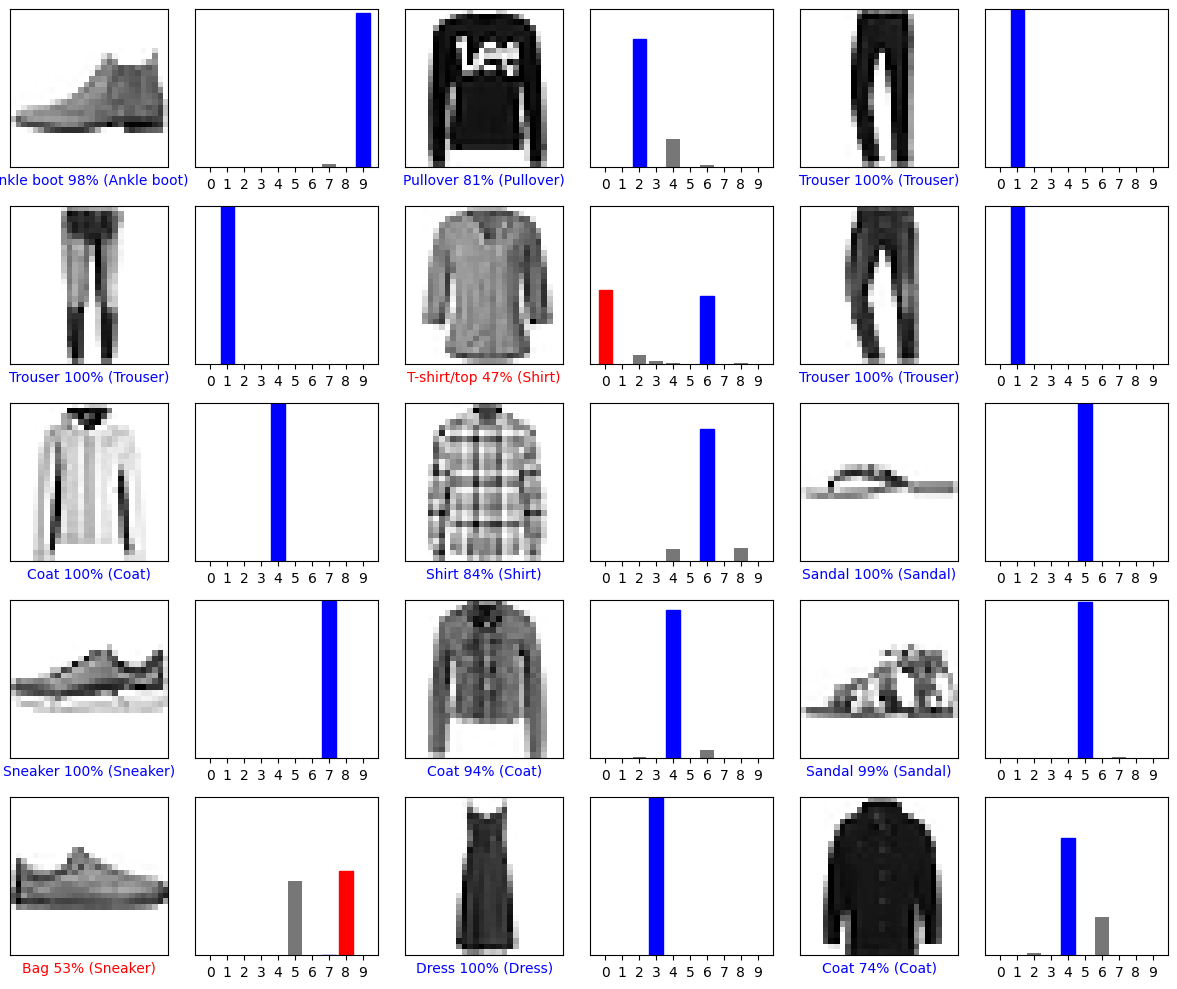

In [71]:
plot_prediction_images()